In [1]:
import os
import pandas as pd
# import IPython.display as ipd
# import librosa
# import librosa.display
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy
import glob
import json

In [2]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']

semitons = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Preparing the data:

In [3]:
data_1 = pd.read_csv('../corpus/generated_chords/chromas.csv')
data_1.set_index('Unnamed: 0', inplace=True)
data_1.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true
Unnamed: 0,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim


In [5]:
data_1.shape

(21420, 13)

In [4]:
data_2 = pd.read_csv('../corpus/generated_chords/chromas_sextas.csv')
data_2.set_index('Unnamed: 0', inplace=True)
data_2.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true
Unnamed: 0,,,,,,,,,,,,,
A6_pictures_at_an_exhibition_Flute.ogg,4377.964355,32880.910156,5019.474121,7995.183594,57190.343750,14562.702148,42539.011719,7987.342285,15612.006836,67433.000000,12095.867188,272.284607,A6
Ab6_aka_upper_sangha_Flute.ogg,105430.601562,16126.598633,20293.580078,176675.875000,49414.941406,126885.312500,26569.162109,64049.675781,295492.312500,56354.718750,34837.425781,20479.087891,Ab6
Gb6_Nawakhat_Flute.ogg,2221.093262,18101.259766,3810.706055,6480.283691,2520.224854,5788.323730,36861.945312,7206.237793,3982.562500,8622.194336,43399.601562,4678.457520,Gb6
F6_aka_Flute.ogg,136850.390625,31298.041016,73240.429688,19318.802734,33361.273438,217030.812500,44451.871094,34151.296875,31270.226562,148007.984375,18100.326172,17291.234375,F6
Bb6_samba_Flute.ogg,358.999756,6807.991699,53811.871094,8703.291992,12056.507812,93980.164062,19582.255859,26412.607422,8410.787109,30994.828125,123777.835938,21426.763672,Bb6


In [6]:
data_2.shape

(8568, 13)

In [10]:
data = data_1.append(data_2)
data

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true
Unnamed: 0,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bmin6_aksak_Mandolin.ogg,16182.948242,8705.180664,20829.761719,9344.836914,1372.369141,15385.907227,97140.382812,16663.982422,20104.580078,10952.745117,19318.556641,114169.351562,Bmin6
Dmin6_al-saghil-al-sani_Mandolin.ogg,11750.186523,25080.337891,95794.968750,11448.027344,10699.777344,57970.136719,14236.887695,1739.712891,11223.805664,56963.859375,16725.349609,46590.656250,Dmin6
Bbmin6_outside_now_Mandolin.ogg,8920.928711,28987.603516,11151.713867,1258.738770,15935.161133,97161.570312,14281.730469,9582.017578,11145.481445,27221.435547,160329.109375,21640.814453,Bbmin6


In [11]:
def fix_meio_dim(chord):
    if 'meio' in chord:
        return chord + '_dim'
    else:
        return chord
    
data['true_fixed'] = data['true'].map(fix_meio_dim)
data.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true,true_fixed
Unnamed: 0,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim,Adim
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim,Ddim
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim,Ddim
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim,Adim
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim,Cdim


Carregando os chromas perfeitos:

In [18]:
# Opening JSON file
with open('../perfect_chromas.json') as json_file:
    perfect_chromas = json.load(json_file)
    
perfect_chromas

{'Cmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Dbmaj7': [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'Dmaj7': [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Ebmaj7': [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Emaj7': [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Fmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Gbmaj7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 'Gmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Abmaj7': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
 'Amaj7': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 'Bbmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0],
 'Bmaj7': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0],
 'C7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Db7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0

In [19]:
vec_Cmaj7 = perfect_chromas['Cmaj7']
vec_Cmaj7 = np.array(vec_Cmaj7)
vec_Cmaj7

array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])

In [20]:
dists = {}
for key, value in perfect_chromas.items():
#     chroma_norm = vec_Cmaj7.T/chroma.max()
    value = np.array(value)
    dist = np.linalg.norm(value - vec_Cmaj7)
    print('Acorde:', key, '|', 'Distância:', dist)
    dists[key] = dist
    print('--------------------------------')

Acorde: Cmaj7 | Distância: 0.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gmaj7 | Distância: 2.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Db7 | Distância: 2.449489742783178
-------

A representação de um acorde será determinada a partir da distância dele ao Cmaj7. Abaixo, calculamos essas distâncias e ordenamos os acordes de acordo com elas.

In [21]:
df_chords_codes = pd.DataFrame(data=dists.values(), index=dists.keys()).sort_values(0, ascending=True)

df_chords_codes.rename(columns={0:'distance'}, 
                       inplace=True)

df_chords_codes['target'] = list(range(len(df_chords_codes)))
df_chords_codes

,distance,target
Cmaj7,0.000000,0
C7,1.414214,1
Emin7,1.414214,2
C6,1.414214,3
G6,1.414214,4
...,...,...
Gbmaj7,2.828427,79
Gbmin6,2.828427,80
Dmaj7,2.828427,81
Bbmin7,2.828427,82


In [53]:
# df_chords_codes.reset_index()

In [22]:
data.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true,true_fixed
Unnamed: 0,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim,Adim
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim,Ddim
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim,Ddim
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim,Adim
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim,Cdim


In [24]:
df_model = data.reset_index().merge(df_chords_codes.reset_index(), 
                      left_on='true_fixed', 
                      right_on='index')

df_model.set_index('Unnamed: 0', inplace=True)

df_model.tail()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true,true_fixed,index,distance,target
Unnamed: 0,,,,,,,,,,,,,,,,,
Cmin6_al-saghil-al-sani_Mandolin.ogg,21271.873047,6398.417480,12423.007812,52763.734375,14161.289062,1788.973267,6503.000000,33173.417969,12204.176758,37931.902344,10314.855469,4435.684082,Cmin6,Cmin6,Cmin6,2.0,24
Cmin6_aksak_Mandolin.ogg,25615.242188,6943.400391,11143.852539,41899.753906,13317.035156,1857.554688,6784.724609,36439.296875,10215.032227,23398.250000,7580.921387,4766.148438,Cmin6,Cmin6,Cmin6,2.0,24
Cmin6_aka_Mandolin.ogg,147261.140625,36301.972656,47782.800781,137621.765625,54244.875000,9685.922852,41624.644531,223392.812500,59831.417969,133271.234375,34312.261719,27735.392578,Cmin6,Cmin6,Cmin6,2.0,24
Cmin6_pictures_at_an_exhibition_Mandolin.ogg,33618.753906,9289.677734,14170.793945,50836.207031,17431.453125,2489.943115,9123.593750,49761.722656,17722.798828,53293.003906,12353.666992,6173.187500,Cmin6,Cmin6,Cmin6,2.0,24
Cmin6_agogo-samba_Mandolin.ogg,68835.992188,17958.169922,29392.718750,110409.882812,34664.074219,4736.216309,18827.271484,103703.445312,32181.273438,85032.210938,22222.169922,13206.863281,Cmin6,Cmin6,Cmin6,2.0,24


In [25]:
df_model.shape

(29988, 17)

In [26]:
# normalizando cada coluna
# dividindo pelo valor máximo de cada chroma
for note in notes:
    df_model[note + '_norm'] = df_model[note]/df_model[notes].max(axis=1)
    
df_model

,C,Db,D,Eb,E,F,Gb,G,Ab,A,...,D_norm,Eb_norm,E_norm,F_norm,Gb_norm,G_norm,Ab_norm,A_norm,Bb_norm,B_norm
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,...,0.051887,0.421232,0.236172,0.094706,0.436516,0.248160,0.146094,1.000000,0.288199,0.096547
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,...,0.049189,0.406956,0.287159,0.130650,0.597580,0.202693,0.140847,1.000000,0.277790,0.066827
Adim_ngbaka-maibo_Flute.ogg,68037.242188,12835.152344,4870.505371,40230.593750,39330.230469,17371.283203,75865.453125,33637.277344,22151.335938,148937.390625,...,0.032702,0.270117,0.264072,0.116635,0.509378,0.225848,0.148729,1.000000,0.237501,0.074684
Adim_york-samai_Flute.ogg,22348.162109,3972.228760,2144.426758,17316.121094,7306.083496,7339.908691,43593.343750,13212.253906,4215.419434,27228.595703,...,0.049192,0.397219,0.167596,0.168372,1.000000,0.303080,0.096699,0.624604,0.222966,0.088669
Adim_mpre_Flute.ogg,45878.093750,8526.463867,3851.276611,31584.609375,23283.982422,11233.979492,53161.980469,22626.351562,13100.133789,89041.476562,...,0.043253,0.354718,0.261496,0.126166,0.597047,0.254110,0.147124,1.000000,0.266294,0.087253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cmin6_al-saghil-al-sani_Mandolin.ogg,21271.873047,6398.417480,12423.007812,52763.734375,14161.289062,1788.973267,6503.000000,33173.417969,12204.176758,37931.902344,...,0.235446,1.000000,0.268391,0.033905,0.123248,0.628716,0.231299,0.718901,0.195491,0.084067
Cmin6_aksak_Mandolin.ogg,25615.242188,6943.400391,11143.852539,41899.753906,13317.035156,1857.554688,6784.724609,36439.296875,10215.032227,23398.250000,...,0.265965,1.000000,0.317831,0.044333,0.161928,0.869678,0.243797,0.558434,0.180930,0.113751
Cmin6_aka_Mandolin.ogg,147261.140625,36301.972656,47782.800781,137621.765625,54244.875000,9685.922852,41624.644531,223392.812500,59831.417969,133271.234375,...,0.213896,0.616053,0.242823,0.043358,0.186329,1.000000,0.267831,0.596578,0.153596,0.124155


In [27]:
df_model.columns

Index(['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B', 'true',
       'true_fixed', 'index', 'distance', 'target', 'C_norm', 'Db_norm',
       'D_norm', 'Eb_norm', 'E_norm', 'F_norm', 'Gb_norm', 'G_norm', 'Ab_norm',
       'A_norm', 'Bb_norm', 'B_norm'],
      dtype='object')

### Train/test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_model[list(map(lambda x:x+'_norm', notes))],
                                                    df_model['target'],
                                                    test_size=0.3)

In [30]:
X_train

,C_norm,Db_norm,D_norm,Eb_norm,E_norm,F_norm,Gb_norm,G_norm,Ab_norm,A_norm,Bb_norm,B_norm
Unnamed: 0,,,,,,,,,,,,
Amin6_spanish_tango_Clarinet.ogg,0.267887,0.532505,0.097047,0.073897,0.294329,0.078258,0.362169,1.000000,0.148618,0.142198,0.088034,0.400437
Dmeio_dim_Nawakhat_Marimba.ogg,0.511367,0.129881,0.352978,0.092474,0.154269,1.000000,0.173767,0.112530,0.734225,0.125632,0.006144,0.079214
Bbmin6_samba_Harp.ogg,0.071716,0.350533,0.060900,0.005528,0.023454,0.144342,0.031840,0.049630,0.021095,0.169792,1.000000,0.151179
Ddim_bendir_Bagpipes.ogg,0.382836,0.198461,1.000000,0.684930,0.215244,0.217383,0.670895,0.137700,0.264570,0.890756,0.247789,0.251170
Dmaj7_cinquillo_Oboe.ogg,0.023499,0.264796,0.921266,0.167682,0.206018,0.233069,1.000000,0.105010,0.047200,0.116311,0.019676,0.002745
...,...,...,...,...,...,...,...,...,...,...,...,...
Amaj7_agsag-samai_Banjo.ogg,0.217132,0.750818,0.206284,0.291922,0.497954,0.118084,0.035038,0.129920,1.000000,0.432024,0.104100,0.332440
Ebdim_ngbaka-maibo_Bagpipes.ogg,0.201677,0.533314,0.224086,1.000000,0.867595,0.200306,0.180077,0.394130,0.096473,0.259411,0.711526,0.185623
Dbdim_aka_upper_sangha_Choir.ogg,0.225657,0.258768,0.045057,0.049292,0.150371,0.106067,0.185249,0.292747,0.253655,0.177357,1.000000,0.415162


### Gaussian process model

In [18]:
from sklearn.gaussian_process.kernels import Kernel, Hyperparameter
from sklearn.gaussian_process.kernels import GenericKernelMixin
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.base import clone

In [19]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [20]:
# from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0).fit(X_train, y_train)

gpr.score(X_train, y_train)

# gpr.predict(X[:2,:], return_std=True)


0.41544463761275496

In [29]:
y_pred = gpr.predict(X_test)
y_pred

array([38.03974924, 36.2590559 , 31.40437652, ..., 38.01157809,
       16.77744973, 27.03242246])

In [30]:
# y_pred = y_pred.round()
# y_pred

### Classification report

In [31]:
from sklearn.metrics import classification_report

Calcular métricas de avaliação de performance de regressão (resíduos)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -6.0       0.00      0.00      0.00         0
        -4.0       0.00      0.00      0.00         0
        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.50      0.01      0.02        97
         1.0       0.00      0.00      0.00       105
         2.0       0.09      0.01      0.02        89
         3.0       0.23      0.03      0.05       111
         4.0       0.25      0.03      0.06       119
         5.0       0.00      0.00      0.00       107
         6.0       0.00      0.00      0.00       103
         7.0       0.00      0.00      0.00       117
         8.0       0.00      0.00      0.00        92
         9.0       0.00      0.00      0.00        98
        10.0       0.04      0.02      0.03       108
        11.0       0.00      0.00      0.00       114
        12.0       0.13      0.10      0.11       109
        13.0       0.00    

/home/fccoelho/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fccoelho/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fccoelho/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fccoelho/.local/lib/python3.10/si

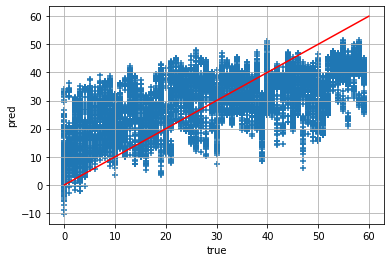

In [36]:
plt.scatter(y_test, y_pred, marker='+')
plt.plot([0,60], [0,60], color='red')
plt.xlabel('true')
plt.ylabel('pred')
plt.grid()

# Multinomial Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [33]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.69      0.48       114
           1       0.62      0.45      0.52       108
           2       0.33      0.63      0.43        93
           3       0.53      0.29      0.37       122
           4       0.66      0.39      0.49       116
           5       0.31      0.65      0.42        95
           6       0.52      0.20      0.29       111
           7       0.49      0.36      0.42       102
           8       0.31      0.31      0.31       105
           9       0.41      0.40      0.41        99
          10       0.52      0.26      0.35       108
          11       0.60      0.28      0.38       108
          12       0.28      0.39      0.32        97
          13       0.48      0.49      0.48       109
          14       0.32      0.55      0.40        89
          15       0.48      0.41      0.44       112
          16       0.39      0.38      0.39       117
          17       0.47    

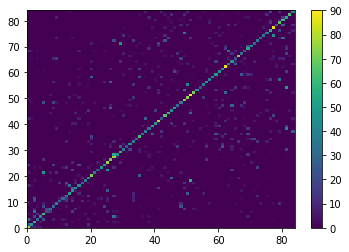

In [34]:
plt.pcolor(confusion_matrix(y_test, y_pred))
plt.colorbar();

In [35]:
matthews_corrcoef(y_test, y_pred)

0.4410536665953513

# LinearSVC

In [36]:
from sklearn.svm import LinearSVC

In [37]:
lsvc = LinearSVC().fit(X_train, y_train)


In [38]:
y_pred = lsvc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       114
           1       0.61      0.72      0.66       108
           2       0.40      0.60      0.48        93
           3       0.65      0.43      0.52       122
           4       0.70      0.64      0.67       116
           5       0.47      0.80      0.60        95
           6       0.49      0.39      0.43       111
           7       0.37      0.60      0.46       102
           8       0.48      0.70      0.57       105
           9       0.57      0.41      0.48        99
          10       0.42      0.16      0.23       108
          11       0.46      0.30      0.36       108
          12       0.39      0.43      0.41        97
          13       0.49      0.62      0.55       109
          14       0.56      0.45      0.50        89
          15       0.52      0.51      0.51       112
          16       0.63      0.33      0.44       117
          17       0.48    

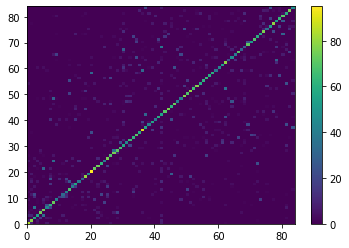

In [39]:
plt.pcolor(confusion_matrix(y_test, y_pred))
plt.colorbar();

In [40]:
matthews_corrcoef(y_test, y_pred)

0.5441780650541723

# SVC

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

In [56]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(X_train, y_train)

svc = SVC()#.fit(X_train, y_train)

# print(skf)

for train_index, test_index in skf.split(X_train, y_train):
    
    X_train_val, X_test_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_val, y_test_val = y_train.iloc[train_index], y_train.iloc[test_index]
    
    svc.fit(X_train_val, y_train_val)
    
    y_pred_val = svc.predict(X_test_val)
    
    print(matthews_corrcoef(y_test_val, y_pred_val))

0.7643882449510676
0.756745528159538
0.7707664686092691
0.7526704312782495
0.7685382916077491


In [52]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       114
           1       0.88      0.73      0.80       108
           2       0.70      0.78      0.74        93
           3       0.84      0.78      0.81       122
           4       0.78      0.80      0.79       116
           5       0.62      0.85      0.72        95
           6       0.91      0.69      0.79       111
           7       0.77      0.70      0.73       102
           8       0.86      0.84      0.85       105
           9       0.87      0.73      0.79        99
          10       0.73      0.62      0.67       108
          11       0.78      0.62      0.69       108
          12       0.75      0.72      0.74        97
          13       0.66      0.71      0.68       109
          14       0.56      0.82      0.66        89
          15       0.64      0.74      0.69       112
          16       0.64      0.78      0.70       117
          17       0.75    

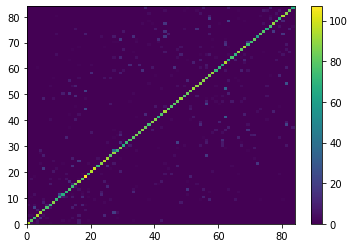

In [55]:
plt.pcolor(confusion_matrix(y_test, y_pred))
plt.colorbar();

In [54]:
matthews_corrcoef(y_test, y_pred)

0.7544974113934135

### Variando o target

Até agora, os classificadores categóricos que testamos têm o Cmaj7 codificado como 0 e a codificação de todos os outros acordes parte dele. Vamos experimentar alterar isso e avaliar a performance.

In [41]:
import itertools

In [100]:
# definindo este dicionário com apenas 5 acordes pra testar. no código definitivo não vou usar
perfect_chromas_5 = dict(itertools.islice(perfect_chromas.items(), 5))
perfect_chromas_5

for acorde, vetor in perfect_chromas.items():
    print(acorde)
    vec_acorde = np.array(vetor)
    
    
    dists = {}
    for key, value in perfect_chromas.items():
        value = np.array(value)
        dist = np.linalg.norm(value - vec_acorde)
        print('Acorde:', key, '|', 'Distância:', dist)
        dists[key] = dist
        print('--------------------------------')
        
    df_chords_codes = pd.DataFrame(data=dists.values(), 
                                   index=dists.keys()).sort_values(0, 
                                                                   ascending=True)

    df_chords_codes.rename(columns={0:'distance'}, 
                           inplace=True)

    df_chords_codes['target_{}'.format(acorde)] = list(range(len(df_chords_codes)))
    
    df_model = df_model.reset_index().merge(df_chords_codes.reset_index(), 
                                            left_on='true_fixed', 
                                            right_on='index')

    df_model.set_index('Unnamed: 0', 
                       inplace=True)
#     df_chords_codes

Cmaj7
Acorde: Cmaj7 | Distância: 0.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gmaj7 | Distância: 2.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Db7 | Distância: 2.449489742783178
-

Emaj7
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 0.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.0
--------------------------------
Acorde: Bbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | Distância: 2.0
----------------

Gmaj7
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 0.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | Distância: 2.449489742783178
--

--------------------------------
Acorde: Gmeio_dim | Distância: 2.449489742783178
--------------------------------
Acorde: Abmeio_dim | Distância: 2.449489742783178
--------------------------------
Acorde: Ameio_dim | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmeio_dim | Distância: 1.4142135623730951
--------------------------------
Acorde: Bmeio_dim | Distância: 2.449489742783178
--------------------------------
Bbmaj7
Acorde: Cmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
-------

Db7
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.0
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Db7 | Distâ

Eb7
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 2.0
--------------------------------
Acorde: Db7 | Distância: 2.4494897

F7
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.0
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.0
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | Distânc

Acorde: D7 | Distância: 2.449489742783178
--------------------------------
Acorde: Eb7 | Distância: 2.449489742783178
--------------------------------
Acorde: E7 | Distância: 2.0
--------------------------------
Acorde: F7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gb7 | Distância: 2.8284271247461903
--------------------------------
Acorde: G7 | Distância: 0.0
--------------------------------
Acorde: Ab7 | Distância: 2.8284271247461903
--------------------------------
Acorde: A7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bb7 | Distância: 2.0
--------------------------------
Acorde: B7 | Distância: 2.449489742783178
--------------------------------
Acorde: Cmin7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmin7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmin7 | Distância: 2.0
--------------------------------
Acorde: Ebmin7 | Distância: 2.8284271247461903
------------------

Bb7
Acorde: Cmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Dbmaj7 | Distância: 2.0
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | Distân

Cmin7
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Ebmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Amaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 1.4142135623730951
--------------------------------
A

Dmin7
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.0
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Fmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Bmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Ac

Emin7
Acorde: Cmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Dbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.0
--------------------------------
Acorde: Db7 | Di

Gbmin7
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Ebmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Amaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
A

Abmin7
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Fmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: C7 | Distância: 2.8284271247461903
--------------------------------


Bbmin7
Acorde: Cmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Dbmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Gmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.0
--------------------------------
Acorde: Bbmaj7 | Distância: 2.0
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
A

Cdim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | Distância: 2.82842712

Ddim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.0
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.0
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Db7 | Distância: 1.4142135

Edim
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.0
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Db7 | Distância: 2.4494897

Gbdim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | Distância: 2.8284271

Abdim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.0
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.0
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Db7 | Distância: 1.414213

Bbdim
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.0
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Db7 | Distância: 2.449489

Cmeio_dim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.0
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: C7 | Distância: 2.0
--------------------------------
Acorde: Db7 | Distância: 2.8

Dmeio_dim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.0
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.0
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.0
--------------------------------
Acorde: Bmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: C7 | Distância: 2.449489742783178
--------------------------------
Acorde: Db7 | 

Emeio_dim
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.0
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.0
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Db7 |

Gbmeio_dim
Acorde: Cmaj7 | Distância: 2.0
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Emaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Fmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.0
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.0
--------------------------------
Acorde: Db7 | Distância: 2.

Abmeio_dim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dmaj7 | Distância: 2.0
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Gbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gmaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.0
--------------------------------
Acorde: C7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Db7 

Bbmeio_dim
Acorde: Cmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Dbmaj7 | Distância: 2.0
--------------------------------
Acorde: Dmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Ebmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Emaj7 | Distância: 2.0
--------------------------------
Acorde: Fmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Gbmaj7 | Distância: 2.0
--------------------------------
Acorde: Gmaj7 | Distância: 2.8284271247461903
--------------------------------
Acorde: Abmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Amaj7 | Distância: 1.4142135623730951
--------------------------------
Acorde: Bbmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: Bmaj7 | Distância: 2.449489742783178
--------------------------------
Acorde: C7 | Distância: 2.0
--------------------------------
Acorde: Db7 | Distância: 2.

In [102]:
df_model

,C,Db,D,Eb,E,F,Gb,G,Ab,A,...,target_Abmeio_dim,index_x,distance_x,target_Ameio_dim,index_y,distance_y,target_Bbmeio_dim,index,distance,target_Bmeio_dim
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,...,31,Adim,1.414214,7,Adim,2.828427,52,Adim,2.44949,29
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,...,31,Adim,1.414214,7,Adim,2.828427,52,Adim,2.44949,29
Adim_ngbaka-maibo_Flute.ogg,68037.242188,12835.152344,4870.505371,40230.593750,39330.230469,17371.283203,75865.453125,33637.277344,22151.335938,148937.390625,...,31,Adim,1.414214,7,Adim,2.828427,52,Adim,2.44949,29
Adim_york-samai_Flute.ogg,22348.162109,3972.228760,2144.426758,17316.121094,7306.083496,7339.908691,43593.343750,13212.253906,4215.419434,27228.595703,...,31,Adim,1.414214,7,Adim,2.828427,52,Adim,2.44949,29
Adim_mpre_Flute.ogg,45878.093750,8526.463867,3851.276611,31584.609375,23283.982422,11233.979492,53161.980469,22626.351562,13100.133789,89041.476562,...,31,Adim,1.414214,7,Adim,2.828427,52,Adim,2.44949,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Emaj7_outside_now_Mandolin.ogg,10574.058594,1926.091675,3433.316162,56737.890625,212276.109375,22103.914062,3112.023438,11845.454102,49821.421875,7870.000000,...,13,Emaj7,2.449490,46,Emaj7,2.000000,18,Emaj7,2.44949,38
Emaj7_aksak_Mandolin.ogg,10376.426758,1492.088745,3527.731445,51728.863281,170200.609375,17468.171875,2854.901367,9171.428711,42606.144531,7182.869629,...,13,Emaj7,2.449490,46,Emaj7,2.000000,18,Emaj7,2.44949,38
Emaj7_york-samai_Mandolin.ogg,8939.829102,946.150879,3648.095459,44141.421875,112385.398438,11260.331055,2627.489502,10729.942383,48903.035156,7757.161621,...,13,Emaj7,2.449490,46,Emaj7,2.000000,18,Emaj7,2.44949,38


In [101]:
# df_model[['target_Cmaj7', 'target_Ebmaj7']]

In [104]:
df_perform_model = pd.DataFrame()

In [106]:
df_perform_model.at['Cmaj7', 'matthews_corrcoef'] = 0.82
df_perform_model

,matthews_corrcoef
Cmaj7,0.82


In [107]:
ids_X_train = X_train.index
ids_X_test = X_test.index

df_perform_model = pd.DataFrame()

for acorde, vetor in perfect_chromas.items():
    
    y_train_new = df_model.loc[ids_X_train]['target_{}'.format(acorde)]
    y_test_new = df_model.loc[ids_X_test]['target_{}'.format(acorde)]
    
    svc = SVC().fit(X_train, y_train_new)

    y_pred = svc.predict(X_test)
    
    df_perform_model.at[acorde, 'matthews_corrcoef'] = matthews_corrcoef(y_test_new, y_pred)
    
    print(acorde, matthews_corrcoef(y_test_new, y_pred))

Cmaj7 0.8223483676962571
Dbmaj7 0.8209051381198174
Dmaj7 0.8218516622505115
Ebmaj7 0.8222063597105521
Emaj7 0.8233061568619084
Fmaj7 0.8214130441959439
Gbmaj7 0.8207491476563373
Gmaj7 0.8226680799706196
Abmaj7 0.822328401205951
Amaj7 0.8207479721549895
Bbmaj7 0.8220515889641024
Bmaj7 0.8218535711714575
C7 0.8210593832809612
Db7 0.8218608777244502
D7 0.8223666507710458
Eb7 0.8205866003003464
E7 0.8231497034881693
F7 0.8220515829426874
Gb7 0.8210618594964714
G7 0.8233028633763206
Ab7 0.8226843845907224
A7 0.8201109380297454
Bb7 0.8218969759530222
B7 0.8231440553676795
Cmin7 0.8215723553304695
Dbmin7 0.8207494553875914
Dmin7 0.8217361893354708
Ebmin7 0.8209040884325087
Emin7 0.822987296497991
Fmin7 0.8231481484133708
Gbmin7 0.8209016654189724
Gmin7 0.8215733459723932
Abmin7 0.822988336746898
Amin7 0.8220321473516851
Bbmin7 0.8209095773324193
Bmin7 0.8234598722243073
Cdim 0.8222055409670009
Dbdim 0.8204284234236575
Ddim 0.8231525066591454
Ebdim 0.8222055409670009
Edim 0.8204284234236575
Fd

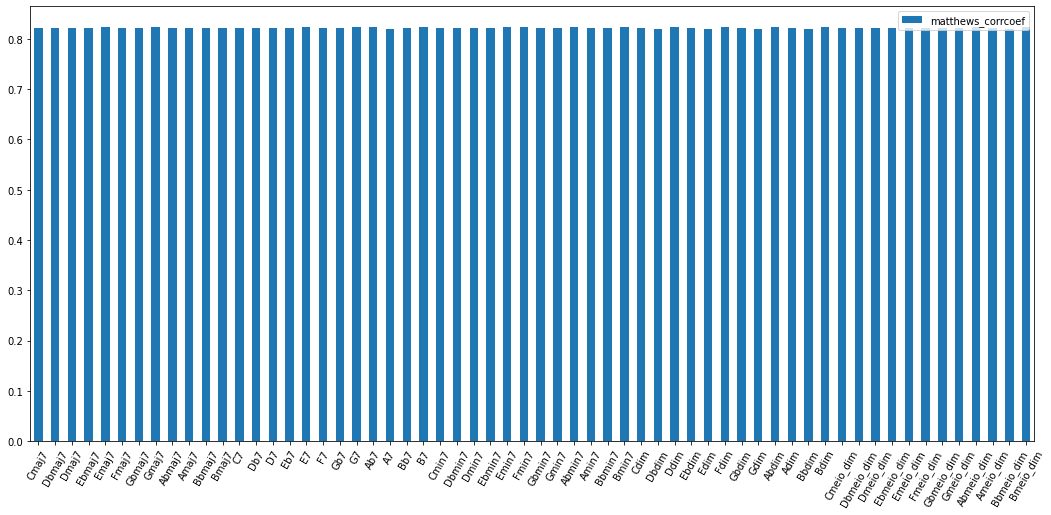

In [118]:
df_perform_model.plot(kind='bar', figsize=(18,8))
plt.xticks(rotation=60);

In [ ]:
midi = 